In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Data/Pipeline_data_toy.csv', index_col=[0])

#df_missing = pd.read_csv('Data/Processed_data.csv', index_col=[0])
#df_missing = pd.read_csv('Data/Processed_data_full.csv', index_col=[0])

In [27]:
df.shape

(10000, 40)

In [28]:
df.head()

,bmi,cigs_before_preg,birthweight_g,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,...,infections,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change
0,46.3,0.0,2183.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,...,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,40.0
1,25.5,0.0,3280.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,...,1.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0,26.0
2,21.8,0.0,2410.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,...,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,31.0
3,22.7,0.0,3544.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,...,0.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,26.0
4,34.0,3.0,2778.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0


In [29]:
df.describe()

,bmi,cigs_before_preg,birthweight_g,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,...,infections,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.205015,1.159307,3268.762025,1218.21940,188.799936,31.475466,29.01810,64.138261,11.362057,0.02036,...,0.026800,0.015000,0.309200,1.703600,2.894200,1.794600,1.332900,0.153300,0.515800,29.408369
std,6.794697,5.019491,588.461544,626.39526,41.889812,6.691271,5.77615,2.779817,4.043179,0.24268,...,0.161507,0.121559,0.462187,0.718609,1.505667,1.159718,0.531701,0.360294,0.499775,15.810185
min,9.641903,-0.297575,277.000000,0.00000,100.000000,15.000000,13.00000,48.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-46.000000
25%,22.300000,0.000000,2977.000000,758.00000,160.000000,27.000000,25.00000,62.000000,10.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,20.000000
50%,25.700000,0.000000,3310.000000,1230.00000,181.000000,31.000000,29.00000,64.000000,11.927388,0.00000,...,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,29.000000
75%,30.700000,0.000000,3630.000000,1723.00000,210.000000,36.000000,33.00000,66.000000,13.000000,0.00000,...,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.000000,1.000000,38.000000
max,66.400000,98.000000,6150.000000,2359.00000,400.000000,76.000000,50.00000,78.000000,49.000000,10.00000,...,1.000000,1.000000,1.000000,4.000000,10.000000,6.000000,4.000000,1.000000,1.000000,164.074740


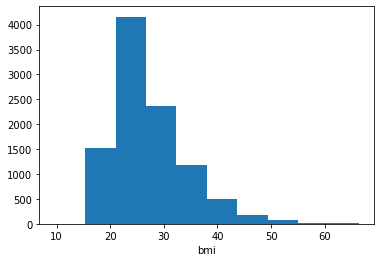

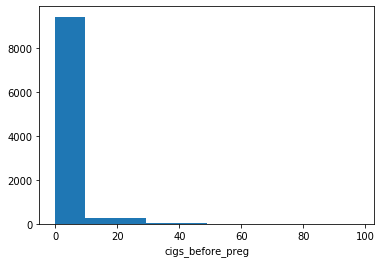

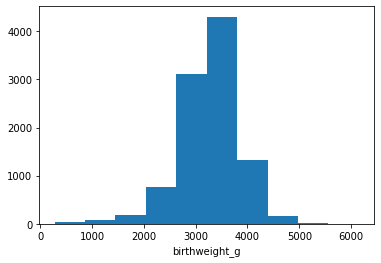

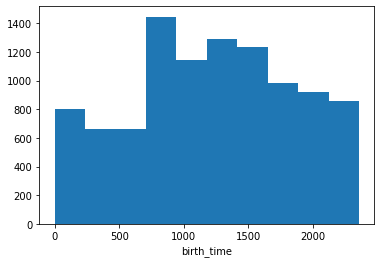

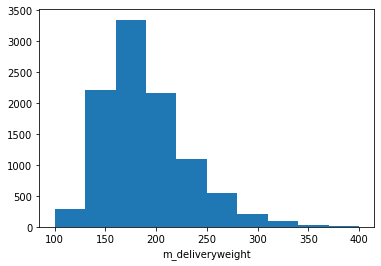

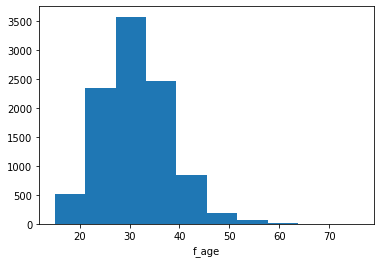

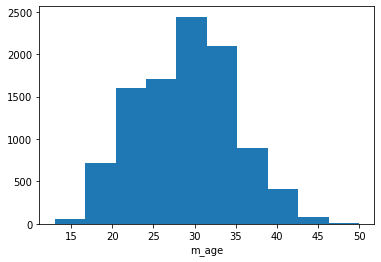

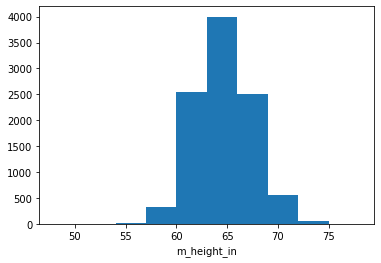

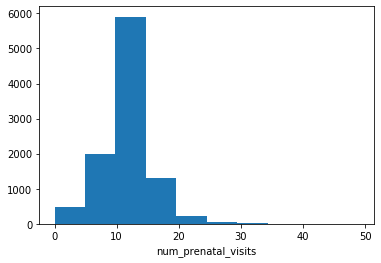

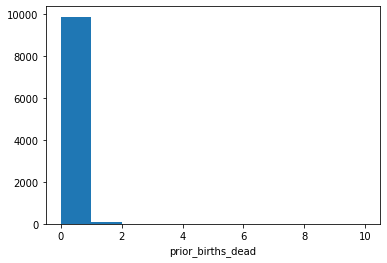

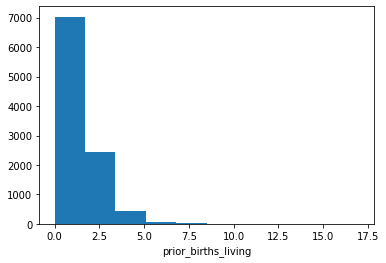

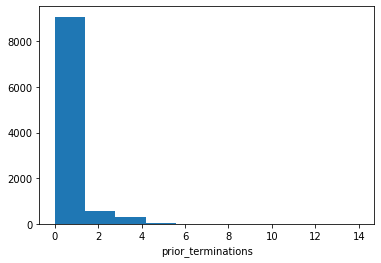

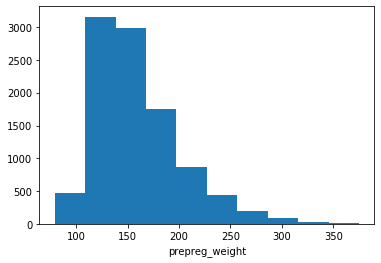

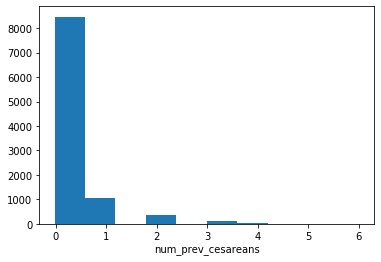

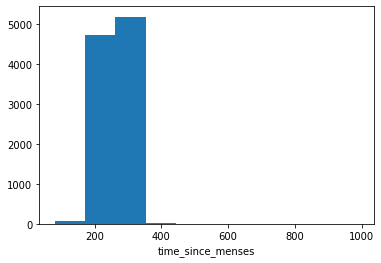

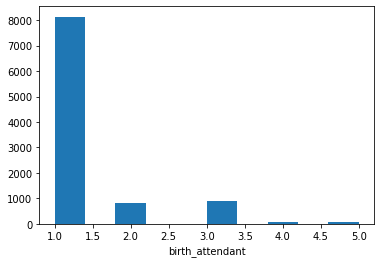

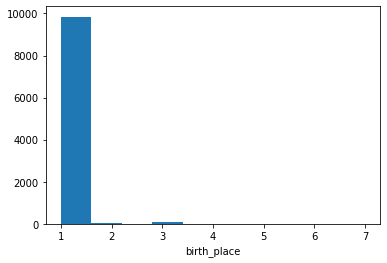

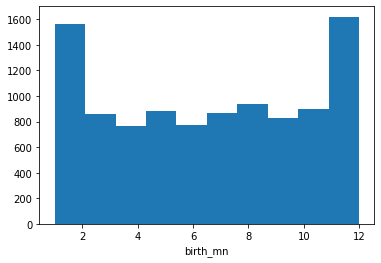

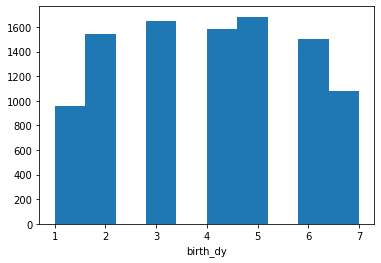

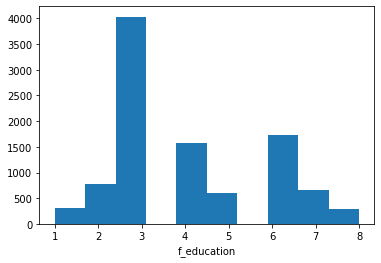

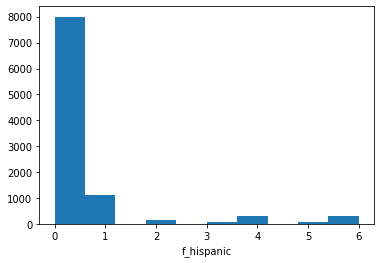

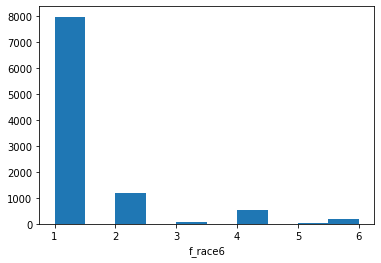

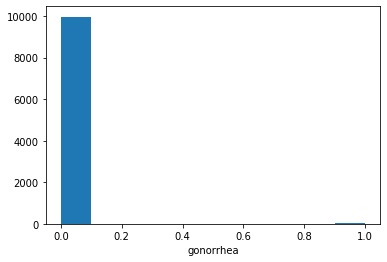

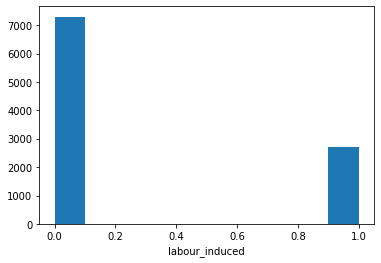

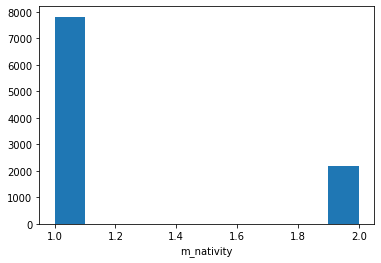

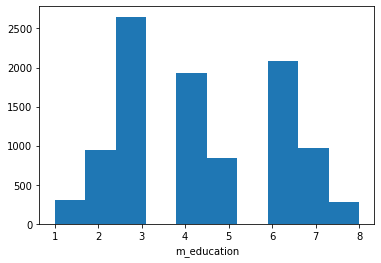

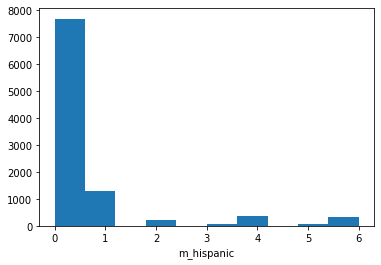

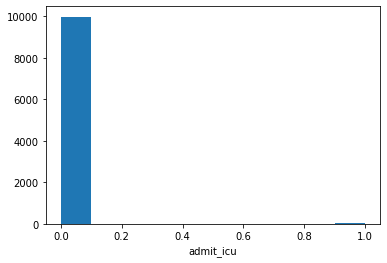

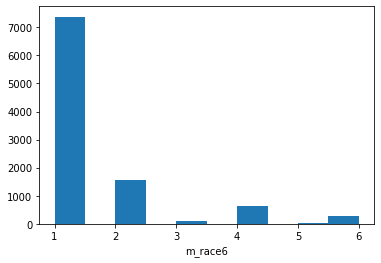

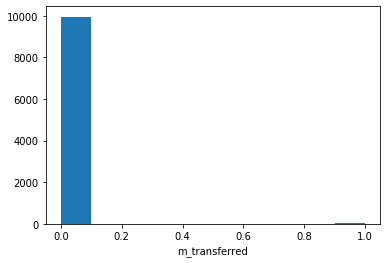

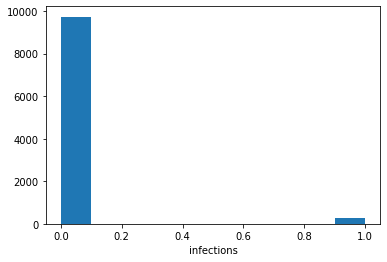

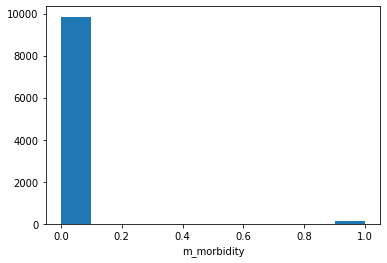

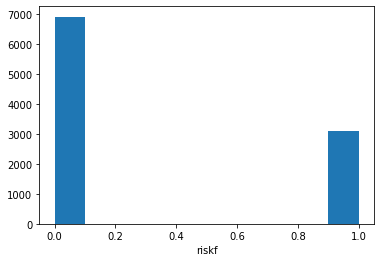

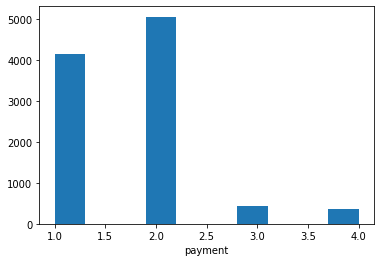

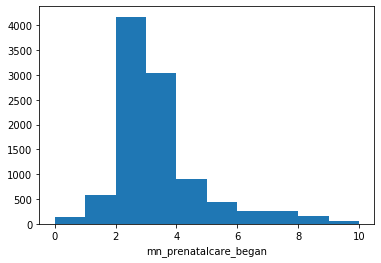

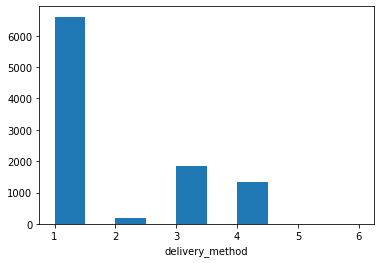

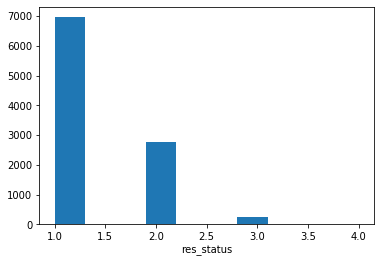

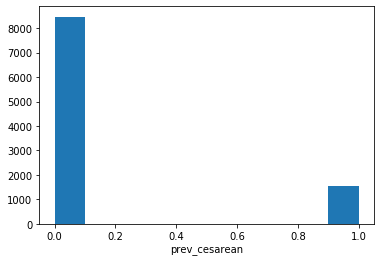

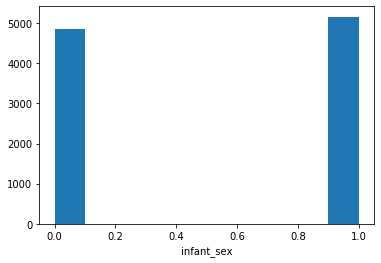

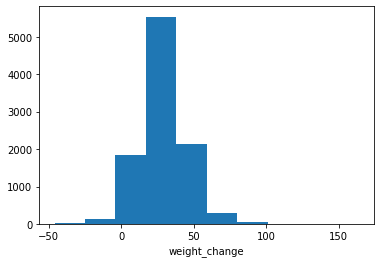

In [30]:
#df.hist(figsize = (50,50))
#plt.show()

columns = list(df.columns)

for i in columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

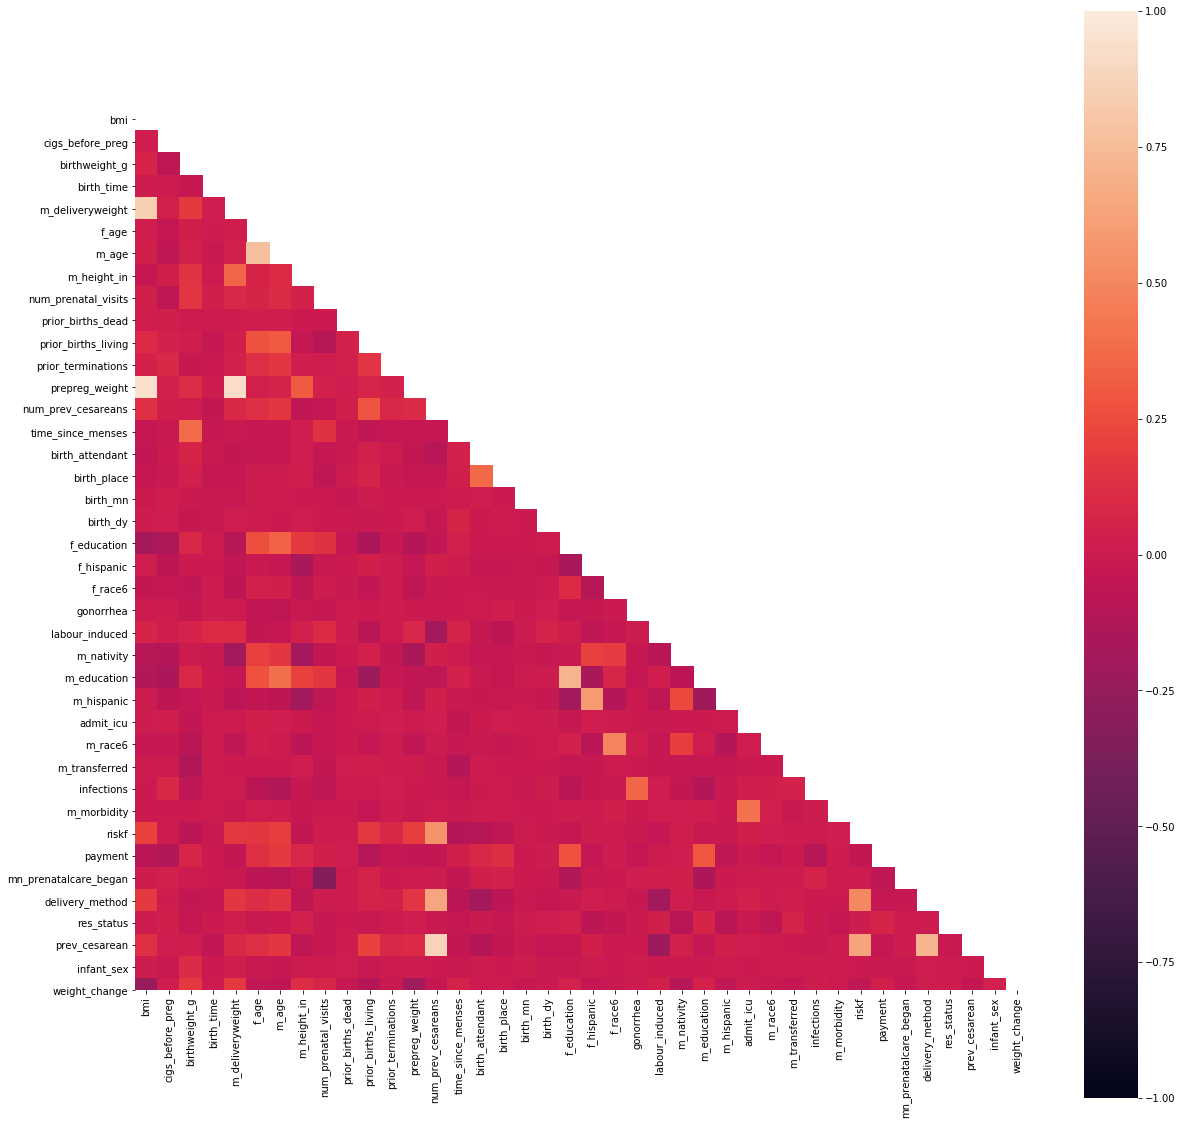

In [31]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask=mask, square=True, vmin=-1, vmax=1)
plt.show()

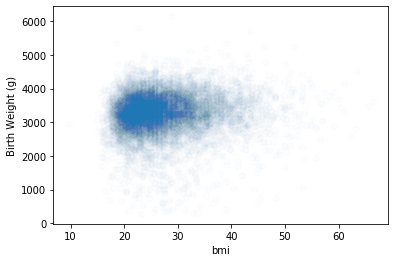

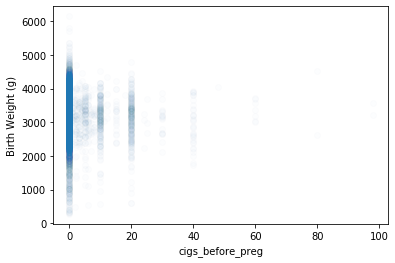

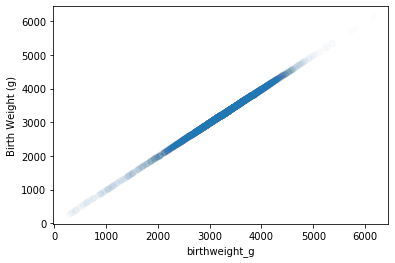

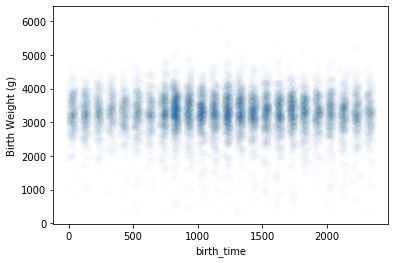

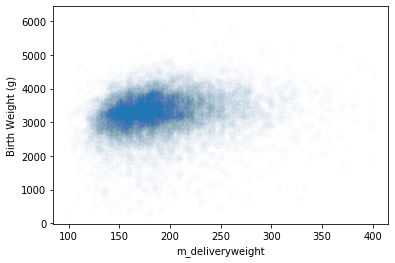

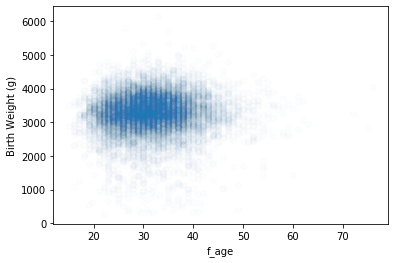

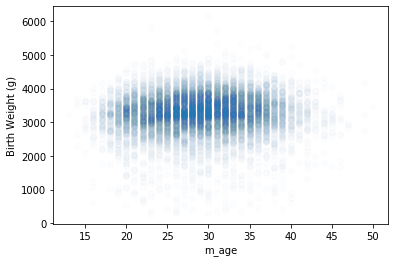

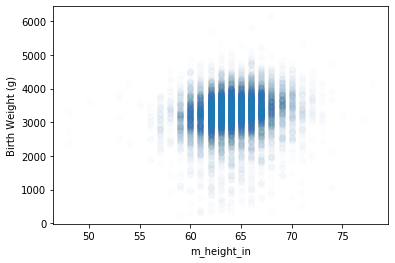

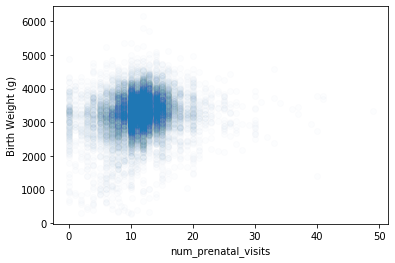

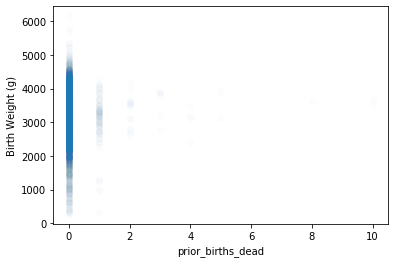

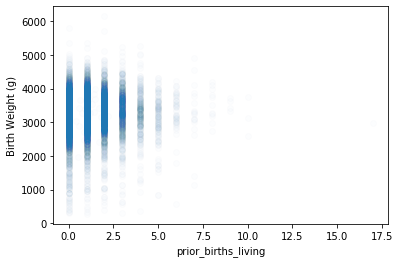

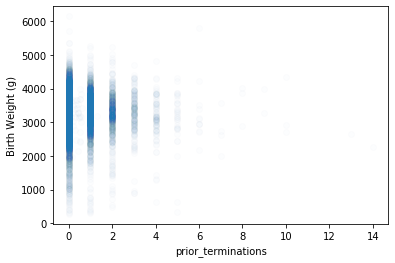

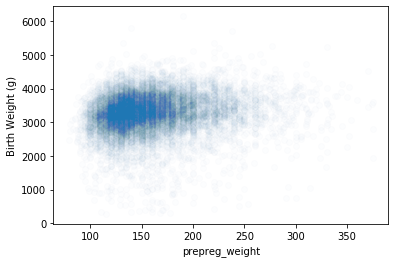

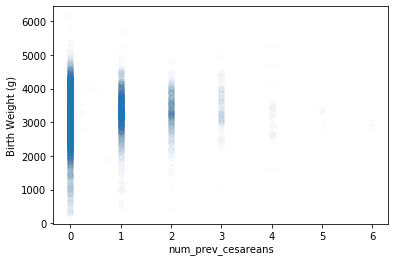

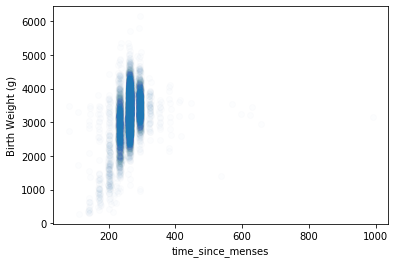

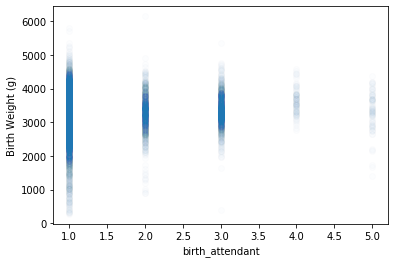

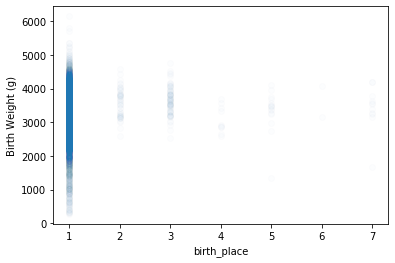

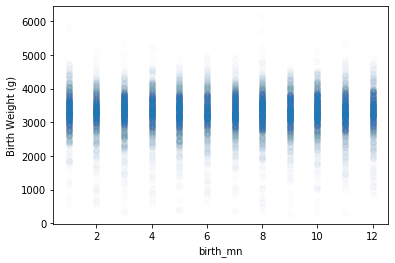

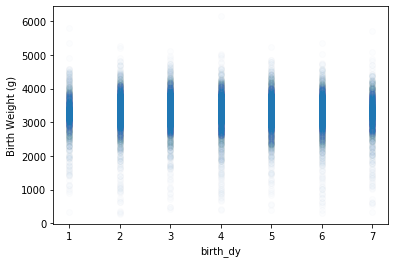

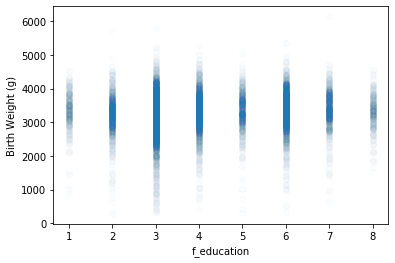

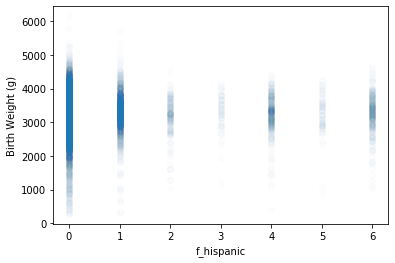

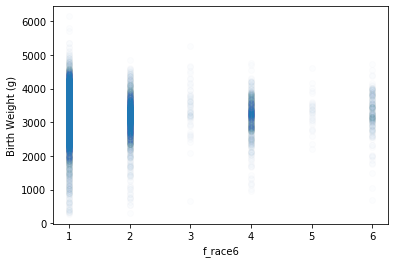

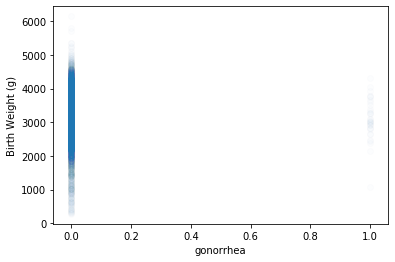

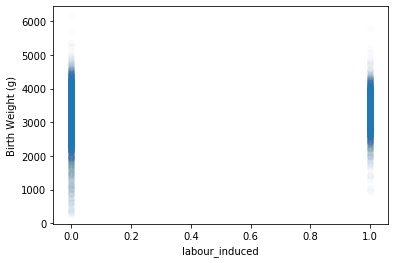

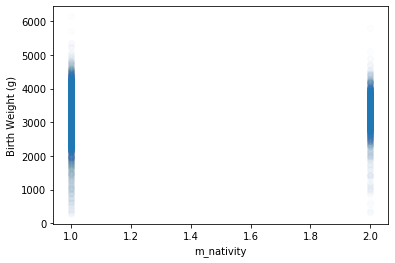

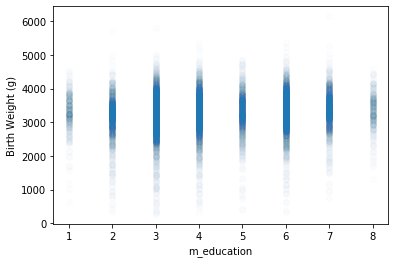

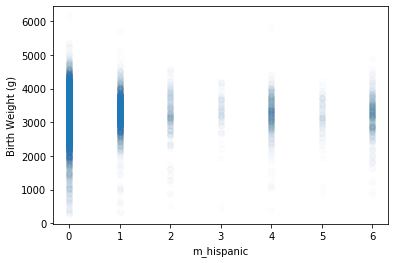

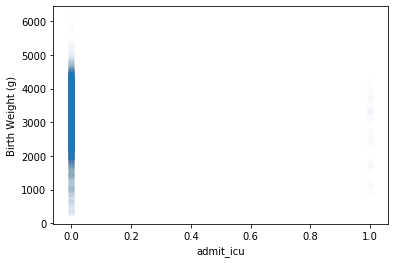

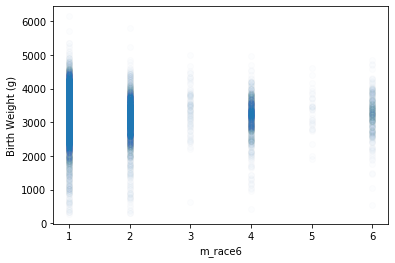

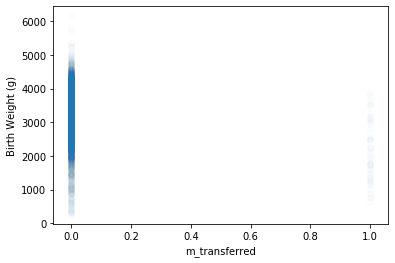

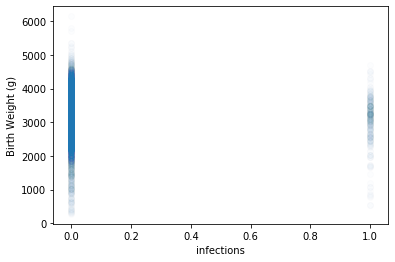

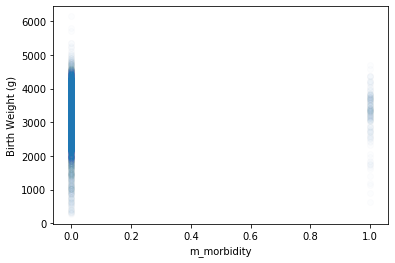

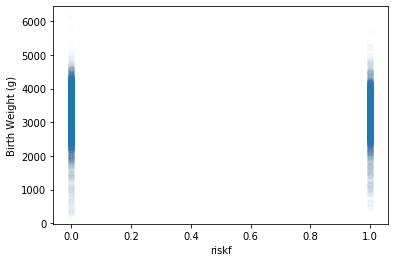

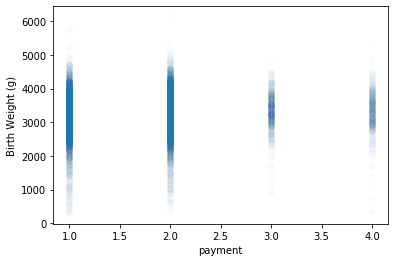

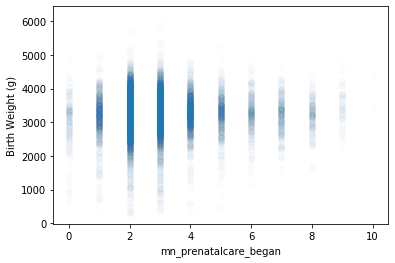

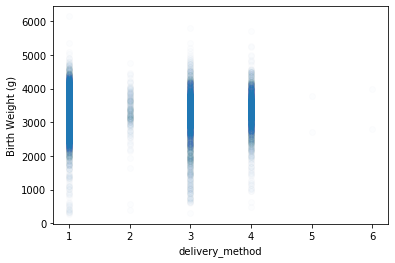

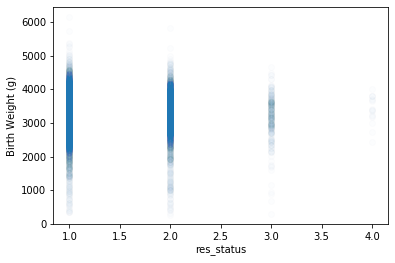

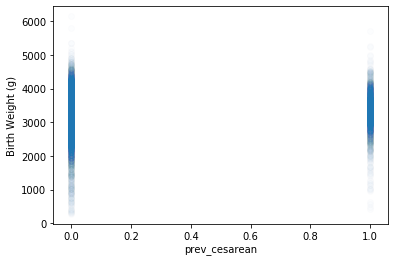

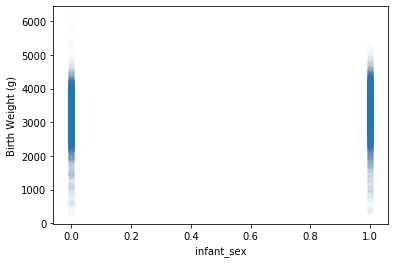

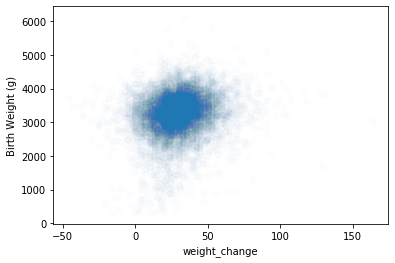

In [33]:
columns = list(df.columns)

for i in columns:
    plt.scatter(df[i], df['birthweight_g'], alpha=0.01)
    plt.xlabel(i)
    plt.ylabel("Birth Weight (g)")
    plt.show()

#### Looking at birthweight

In [34]:
print('{:.2f}% of infants born in US in 2018 were LBW infants'.\
      format(1e2*len(df[df['birthweight_g'] < 2500])/len(df)))

8.31% of infants born in US in 2018 were LBW infants


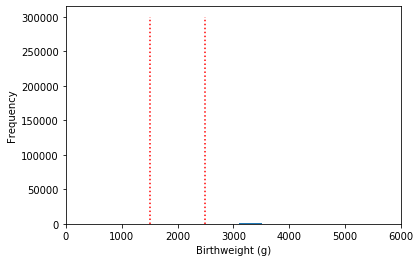

<Figure size 432x288 with 0 Axes>

In [35]:
plt.hist(df['birthweight_g'], bins=10**2)
plt.xlim(0, 6*10**3)
plt.vlines(2500, 0, 3*10**5, colors='red', linestyles='dotted', label='Low BW')
plt.vlines(1500, 0, 3*10**5, colors='red', linestyles='dotted', label='Very Low BW')
plt.xlabel('Birthweight (g)')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Results/Birthweight_histogram.pdf')

#### Visualisation of PCA

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

In [22]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [23]:
pca = PCA(n_components=5)
pca.fit(X_scaled)

x_new = pca.transform(X_scaled)

In [24]:
x_new.shape

(10000, 5)

* Biplot

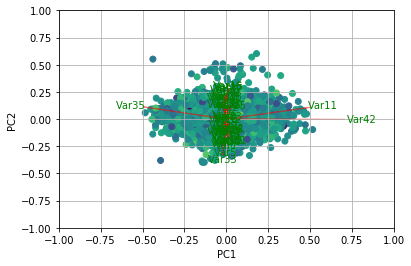

In [22]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

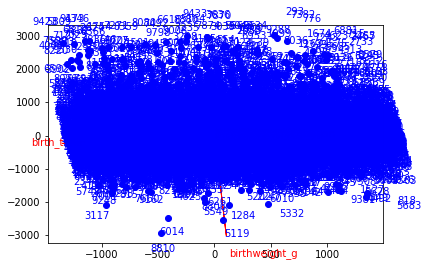

In [23]:
dat = df.copy()
# if no row or column titles in your csv, pass 'header=None' into read_csv
# and delete 'index_col=0' -- but your biplot will be clearer with row/col names



## perform PCA

n = len(dat.columns)

pca = PCA(n_components = n)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(dat)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]




## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(dat.index)[i], color='b')

plt.show()